In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from cobaya.yaml          import yaml_load_file
from cobaya.samplers.mcmc import plot_progress
#
from getdist.mcsamples    import MCSamplesFromCobaya
from getdist.mcsamples    import loadMCSamples
import getdist.plots      as     gdplt
#
import os

In [3]:
info = yaml_load_file("martin_reciso.yaml")
print(info['params'].keys())
print(info['output'])

dict_keys(['apar', 'aperp', 'B1_Martin_RecIso', 'F_Martin_RecIso', 'M0_Martin_RecIso', 'M1_Martin_RecIso', 'M2_Martin_RecIso', 'M3_Martin_RecIso', 'M4_Martin_RecIso', 'Q0_Martin_RecIso', 'Q1_Martin_RecIso', 'Q2_Martin_RecIso', 'Q3_Martin_RecIso', 'Q4_Martin_RecIso'])
chains/martin_reciso


array([<AxesSubplot:ylabel='$R-1$'>, <AxesSubplot:ylabel='acc. rate'>],
      dtype=object)

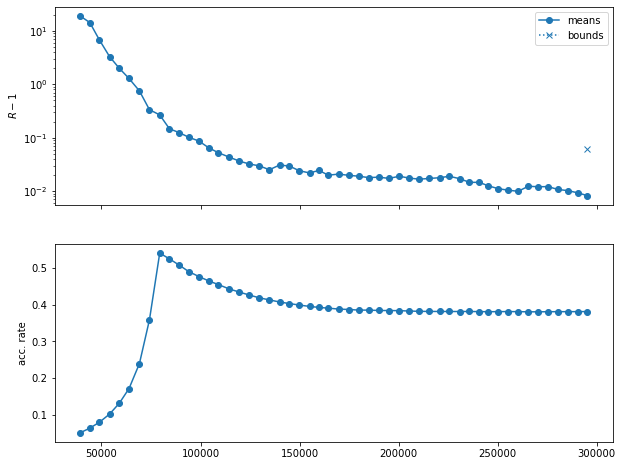

In [48]:
plot_progress(info['output'],figure_kwargs={"figsize": (10,8)})

Mean:
[ 1.00381184e+00  1.00821803e+00  3.37798280e-01  4.17050147e-01
  1.60831689e+03 -1.41207478e+04  2.62402499e+04  1.32864416e+04
  4.90349667e+03  4.54128509e+03 -4.42595630e+04  9.30894112e+04
  3.89021932e+04  1.31920254e+04  1.30244232e+02  1.30244232e+02
  1.83518380e+01  1.83518380e+01]
0.008137521545019597


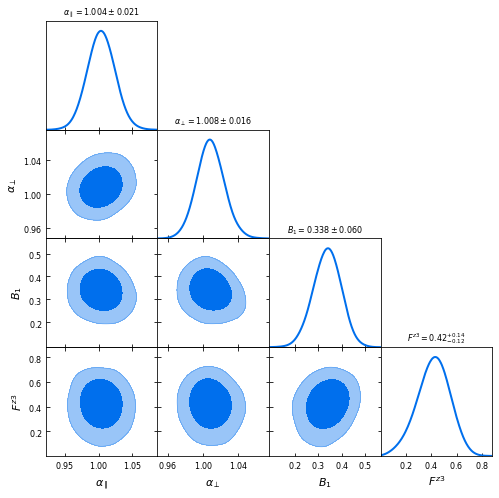

In [49]:
samples = loadMCSamples(os.path.abspath(info["output"]),\
                        settings={'ignore_rows':0.5
                                 })
# Analyze and plot
mean  = samples.getMeans()
print("Mean:")
print(mean)
Rm1 = samples.getGelmanRubin()
print(Rm1)

# List params
samp = 'Martin_RecIso'
params = ["apar","aperp"]
params += [ pstr + samp for pstr in ["B1_","F_"]  ]
#params += [ pstr + samp for pstr in ["M0_","M1_","M2_","M3_","M4_"]  ]
#params += [ pstr + samp for pstr in ["Q0_","Q1_","Q2_","Q3_","Q4_"]  ]



gdplot = gdplt.get_subplot_plotter()

gdplot.triangle_plot(samples,\
                     params,\
                     filled=True,\
                     title_limit=1,contour_lws=2)#,\
                    #param_limits={
    #'sigma8':(0.55,0.95),\
    #'omegam':(0.26,0.40),\
    #'H0':(62,74)})

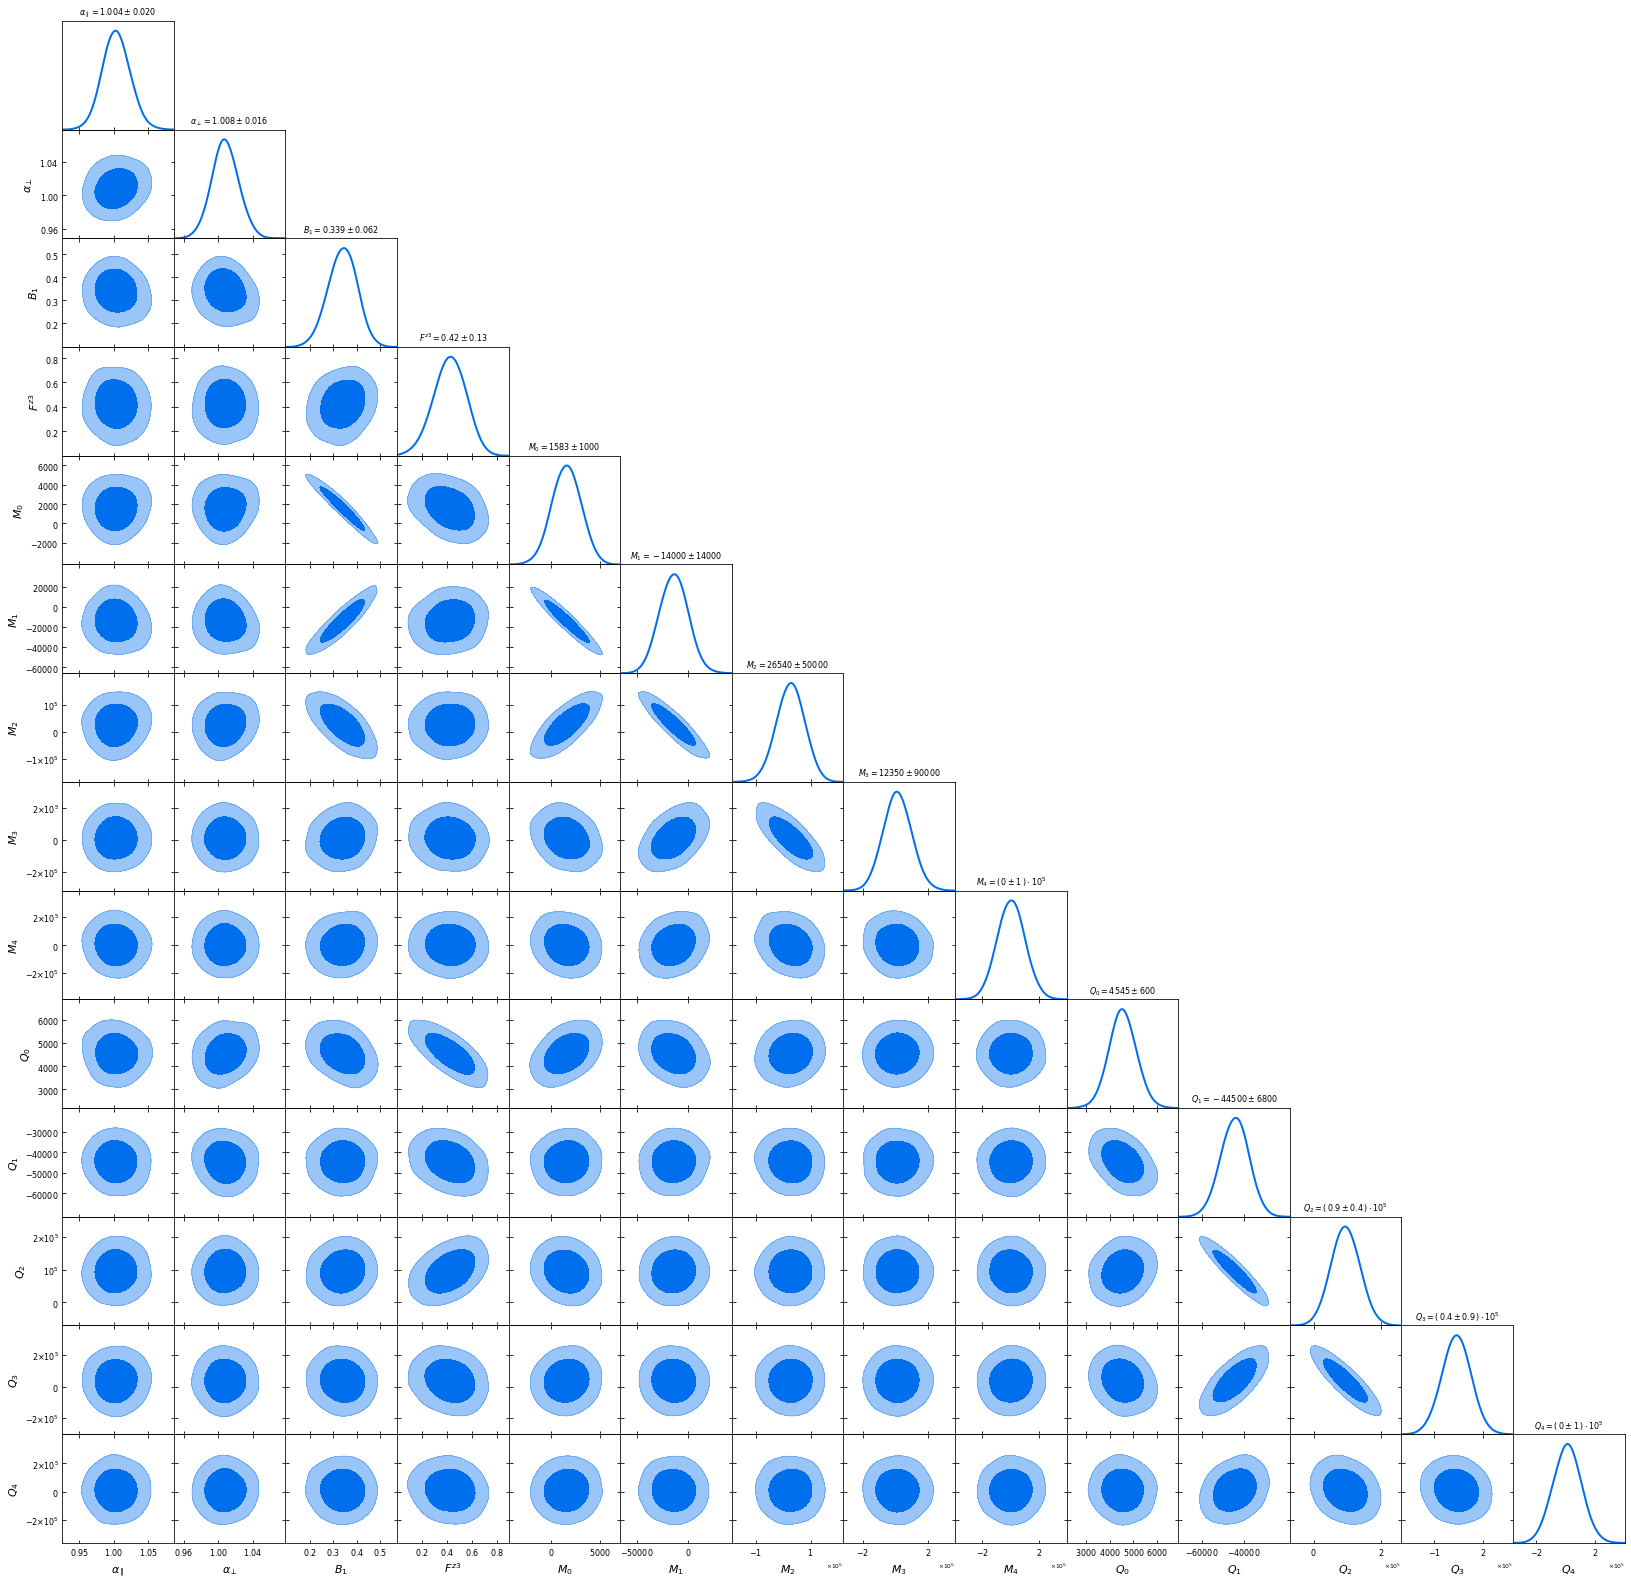

In [35]:
samp = 'Martin_RecIso'
params = ["apar","aperp"]
params += [ pstr + samp for pstr in ["B1_","F_"]  ]
params += [ pstr + samp for pstr in ["M0_","M1_","M2_","M3_","M4_"]  ]
params += [ pstr + samp for pstr in ["Q0_","Q1_","Q2_","Q3_","Q4_"]  ]

gdplot = gdplt.get_subplot_plotter()
gdplot.triangle_plot(samples,\
                     params,\
                     filled=True,\
                     title_limit=1,contour_lws=2)

In [41]:
samples.getEffectiveSamples(j=10)

1983.1270542776153